# Уроки по Python3
## Нейронные сети


### Датасет CIFAR-10

Набор данных CIFAR-10 представляет собой набор изображений, которые обычно используются для обучения алгоритмам машинного обучения и компьютерного зрения. Это один из наиболее широко используемых наборов данных для исследования машинного обучения.

CIFAR-10 содержит 60000 примеров изображений размером 32х32, разделённых на 10 классов (по 6000 изображений на каждый класс): самолеты, автомобили, птицы, кошки, олени, собаки, лягушки, лошади, корабли, грузовики.

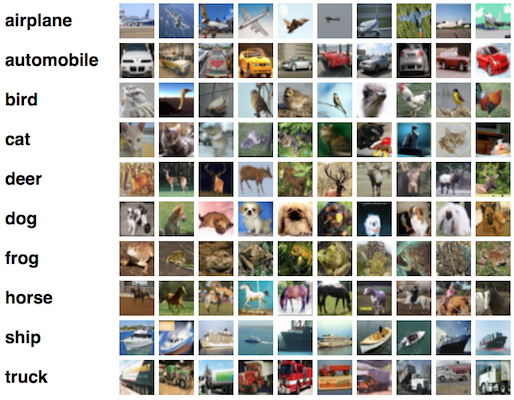

Датасет можно импортировать из модуля **keras.datasets**

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
import os, re

Настройки загрузки, сохранения и обучения модели

In [3]:
trainig = False
load_my_model = True
save_my_model = False

Выбор файла модели для загрузки

In [4]:
load_name = 'cifar10_trained_model_50_epochs.h5'

Выбор (или создание) директории для сохранения модели

In [5]:
save_dir = os.path.join(os.getcwd(), 'data', 'saved_models_cifar10')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

Разделяем датасет на тренировочную и валидационную части

In [6]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [7]:
num_classes = len(np.unique(Y_train))

print('Размер тренировочной части:', X_train.shape)
print(X_train.shape[0], 'картинок для обучения')
print(X_test.shape[0], 'картинок для валидации')

Размер тренировочной части: (50000, 32, 32, 3)
50000 картинок для обучения
10000 картинок для валидации


Создадим список с названием классов и выведем примеры:

In [8]:
class_names = ['Самолёт','Автомобиль','Птица','Кошка','Олень',
               'Собака','Лягушка','Лошадь','Корабль','Грузовик']

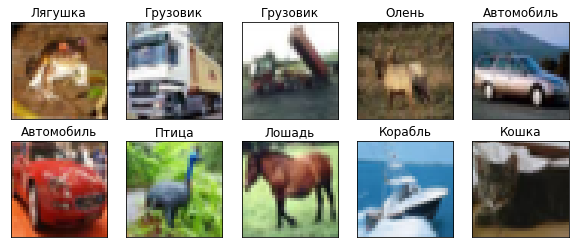

In [9]:
fig = plt.figure(figsize=(10,4))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(Y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = X_train[i].reshape(32, 32, 3)
    ax.set_title(class_names[int(Y_train[i])])
    plt.imshow(im)
plt.show();

Конвертация клссов в бинарные вектора и нормализация изображений

In [10]:
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255

--------

**Создание конволюционной нейронной сети**

In [11]:
model = Sequential() # Создаём последовательную модель в keras

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 нейронов на выходе по количеству классов

Настройка оптимизатора Stochastic Gradient Descent (градиентный спуск)

In [12]:
opt = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

Компиляция модели

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Загрузка модели

In [14]:
if load_my_model:
    model = load_model(os.path.join(save_dir, load_name))
    print('Модель загружена. Файл модели: %s' % load_name)

Модель загружена. Файл модели: cifar10_trained_model_50_epochs.h5


Настройки и запуск расчета на тренировочной выборке

In [15]:
batch_size = 500
epochs = 5

if trainig:
    print('Запуск расчёта модели...')
    history = model.fit(X_train, Y_train, verbose=epochs,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, Y_test),
                        shuffle=True)

Сохраняем веса в файл

In [16]:
if save_my_model and trainig:
    if load_my_model:
        # Need to recount epochs in file name
        a = re.findall('\d+_epochs',load_name)
        b = re.findall('\d+',str(a))
        add_epochs = int(b[0])+epochs
        save_name = 'cifar10_trained_model_%d_epochs.h5' % add_epochs
        model_path = os.path.join(save_dir, save_name)
        model.save(model_path)
        print('Модель сохранена в файл: %s ' % model_path)
    else:
        save_name = 'cifar10_trained_model_%d_epochs.h5' % epochs
        model_path = os.path.join(save_dir, save_name)
        model.save(model_path)
        print('Модель сохранена в файл: %s ' % model_path)
else:
    print('Продолжаем без сохранения')

Продолжаем без сохранения


Оценка полученных результатов на валидационной выборке

In [17]:
scores = model.evaluate(X_test, Y_test, verbose=0)

print('Потери на валидационной выборке = {:.2f}'.format(scores[0]))
print('Точность на валидационной выборке = {:.2f}'.format(scores[1]))

Потери на валидационной выборке = 0.70
Точность на валидационной выборке = 0.76


Визуализация процесса обучения

In [18]:
if trainig:
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['acc'], color='green')
    plt.title('Процесс обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери и точность')
    plt.legend(['Потери', 'Точность'], loc='center right')
    plt.show()

Предсказываем значения на валидационной выборке

In [19]:
Z_test = model.predict(X_test)

Z_test = np.argmax(Z_test, axis=1)
Y_test = np.argmax(Y_test, axis=1)

Выводим матрицу классфикации и отчет о точности полученной модели:

In [20]:
print('Матрица классификации: ', '\n', metrics.confusion_matrix(Y_test, Z_test), '\n')
print('Отчет о классификации: ', '\n', metrics.classification_report(Y_test, Z_test))

Матрица классификации:  
 [[742  21  36  13  12   3   9   8 120  36]
 [ 15 838   4   5   2   2   9   6  35  84]
 [ 56   3 640  58  71  49  61  35  17  10]
 [ 13   7  68 550  59 145  57  47  29  25]
 [ 13   2  53  43 730  13  49  80  13   4]
 [ 10   2  48 166  43 625  22  70   4  10]
 [  5   3  41  49  23  15 840   8  11   5]
 [ 11   3  32  24  57  43   7 803   5  15]
 [ 22  15   5   8   5   2   4   0 909  30]
 [ 15  40  10   7   5   2   2   7  37 875]] 

Отчет о классификации:  
              precision    recall  f1-score   support

          0       0.82      0.74      0.78      1000
          1       0.90      0.84      0.87      1000
          2       0.68      0.64      0.66      1000
          3       0.60      0.55      0.57      1000
          4       0.72      0.73      0.73      1000
          5       0.70      0.62      0.66      1000
          6       0.79      0.84      0.82      1000
          7       0.75      0.80      0.78      1000
          8       0.77      0.91     

Выводим полученные примеры

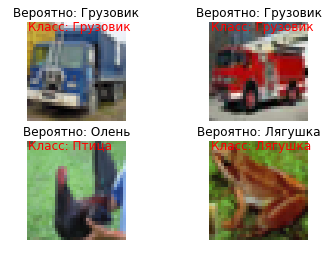

In [21]:
sample1 = 14
sample2 = 23
sample3 = 25
sample4 = 29

plt.figure(1)
plt.subplot(221)
plt.imshow(X_test[sample1].reshape(32, 32, 3))
plt.axis('off')
plt.title('Вероятно: %s' % class_names[int(Z_test[sample1])])
plt.text(0, 2, 'Класс: %s' % class_names[int(Y_test[sample1])], fontdict={'color': 'red', 'size': 12})
plt.subplot(222)
plt.imshow(X_test[sample2].reshape(32, 32, 3))
plt.axis('off')
plt.title('Вероятно: %s' % class_names[int(Z_test[sample2])])
plt.text(0, 2, 'Класс: %s' % class_names[int(Y_test[sample2])], fontdict={'color': 'red', 'size': 12})
plt.subplot(223)
plt.imshow(X_test[sample3].reshape(32, 32, 3))
plt.axis('off')
plt.title('Вероятно: %s' % class_names[int(Z_test[sample3])])
plt.text(0, 2, 'Класс: %s' % class_names[int(Y_test[sample3])], fontdict={'color': 'red', 'size': 12})
plt.subplot(224)
plt.imshow(X_test[sample4].reshape(32, 32, 3))
plt.axis('off')
plt.title('Вероятно: %s' % class_names[int(Z_test[sample4])])
plt.text(0, 2, 'Класс: %s' % class_names[int(Y_test[sample4])], fontdict={'color': 'red', 'size': 12})
plt.show()